In [1]:
import sys
import os
sys.path.append('/hsfscqjf2/ST_CQ/Reference/software/python_lib/')
import cellrank as cr
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cellrank.kernels import CytoTRACEKernel
import warnings
%matplotlib inline
warnings.simplefilter("ignore", category=UserWarning)

# scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo",format='pdf',vector_friendly=False)
sc.settings.set_figure_params(frameon=False, dpi=100,format='pdf',vector_friendly=False)
cr.settings.verbosity = 2

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# cm-ep-cuticle

In [2]:
pal_celltype={"Cell_morphogenesis":'#1f77b4',
  "Epithelial_1":'#279e68',
        "Epithelial_2":'#98df8a',
       "Epithelial_3":'#b5bd61',
"Cuticle_1":'#d62728',
 "Cuticle_2":'#e377c2',
 "Cuticle_3":'#ff9896'}
pal_timepoint={"L5D1":"#EEE8DA",
                 "L5D2":"#BFE2E3",
                 "L5D3":"#A1CFFA",
                 "L5D4":"#A0BFAF",
                 "L5D5":"#78BDAD",
                 "L5D6":"#397A7F",
                 "L5D7":"#1F5392",
                 "WD1":"#F0918E",
                 "WD2":"#D45651",
                 "P6":"#AE98D6"}

In [3]:
os.chdir("/hsfscqjf1/ST_CQ/P23Z32300N0005/hemingmin/bom/10.sc_merged1/results/6_trajectory/monocle2/cell_morphogenesis")

In [4]:
anno_file =sc.read_h5ad( '/hsfscqjf1/ST_CQ/P23Z32300N0005/hemingmin/bom/10.sc_merged1/results/5_anno/anno.h5ad')

In [5]:
Pseudotime_cm=pd.read_csv("Pseudotime_cm.csv",index_col=0)
Pseudotime_cm["celltype_v1"].index= Pseudotime_cm["celltype_v1"].index.astype(str)
keep_cells=Pseudotime_cm.index

In [6]:
# filters cells
adata = anno_file[anno_file.obs_names.isin(keep_cells)]
adata

View of AnnData object with n_obs × n_vars = 6665 × 16122
    obs: 'seq_folder', 'nUMI', 'nGene', 'library', 'log10GenesPerUMI', 'cells', 'sample', 'batch', 'timepoint', 'nCount_RNA', 'nFeature_RNA', 'leiden_res0.4', 'leiden_res0.5', 'leiden_res0.6', 'leiden_res0.8', 'leiden_res1', 'cluster', 'seurat_clusters', 'celltype_v1'
    var: 'name'
    obsm: 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap'

In [7]:
index_match = Pseudotime_cm["celltype_v1"].index.equals(adata.obs["celltype_v1"].index)
index_match

True

In [9]:
adata.obs['X_Pseudotime']=Pseudotime_cm['Pseudotime']

In [10]:
adata.obs['celltype_plot']=np.nan
adata.obs.loc[adata.obs['celltype_v1']=='Cuticle_1','celltype_plot']='Cuticle'
adata.obs.loc[adata.obs['celltype_v1']=='Cuticle_2','celltype_plot']='Cuticle'
adata.obs.loc[adata.obs['celltype_v1']=='Cuticle_3','celltype_plot']='Cuticle'
adata.obs.loc[adata.obs['celltype_v1']=='Epithelial_1','celltype_plot']='Epithelial'
adata.obs.loc[adata.obs['celltype_v1']=='Epithelial_2','celltype_plot']='Epithelial'
adata.obs.loc[adata.obs['celltype_v1']=='Epithelial_3','celltype_plot']='Epithelial'
adata.obs.loc[adata.obs['celltype_v1']=='Cell_morphogenesis','celltype_plot']='Cell_morphogenesis'

In [12]:
sc.pp.neighbors(adata)

In [13]:
adata.obsm["raw_umap"]=adata.obsm["X_umap"]
adata.obsm["raw_pca"]=adata.obsm["X_pca"]

In [14]:
sc.tl.umap(adata,random_state=0)


In [15]:
from cellrank.kernels import PseudotimeKernel
pk = PseudotimeKernel(adata, time_key="X_Pseudotime")
pk.compute_transition_matrix()

Computing transition matrix based on pseudotime


  0%|          | 0/6665 [00:00<?, ?cell/s]

    Finish (0:00:05)


PseudotimeKernel[n=6665, dnorm=False, scheme='hard', frac_to_keep=0.3]

Projecting transition matrix onto `umap`
Adding `adata.obsm['T_fwd_umap']`
    Finish (0:00:01)
saving figure to file ./figures/scvelo_Umap_cm_trajectory_celltype.svg


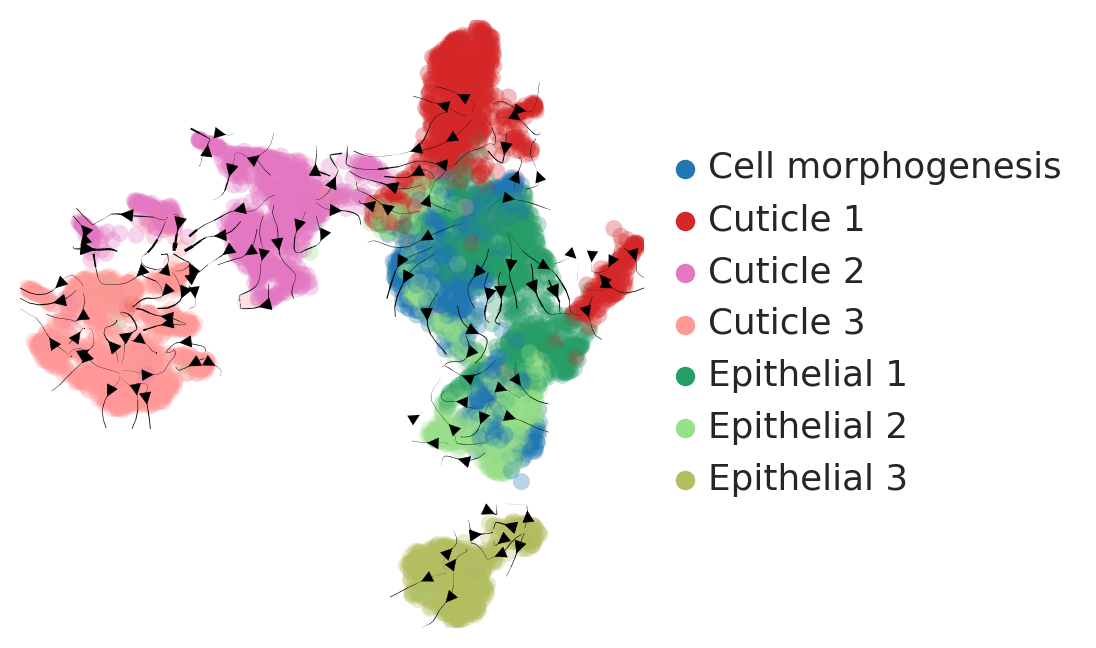

In [23]:
plt.style.use('seaborn-white')
pk.plot_projection(basis="umap", color = ["celltype_v1"],recompute=True,
                   palette=pal_celltype,
                   legend_loc="right",title="",
                   save="Umap_cm_trajectory_celltype.svg")



Projecting transition matrix onto `umap`
Adding `adata.obsm['T_fwd_umap']`
    Finish (0:00:01)
saving figure to file ./figures/scvelo_Umap_cm_trajectory_celltype_merge.svg


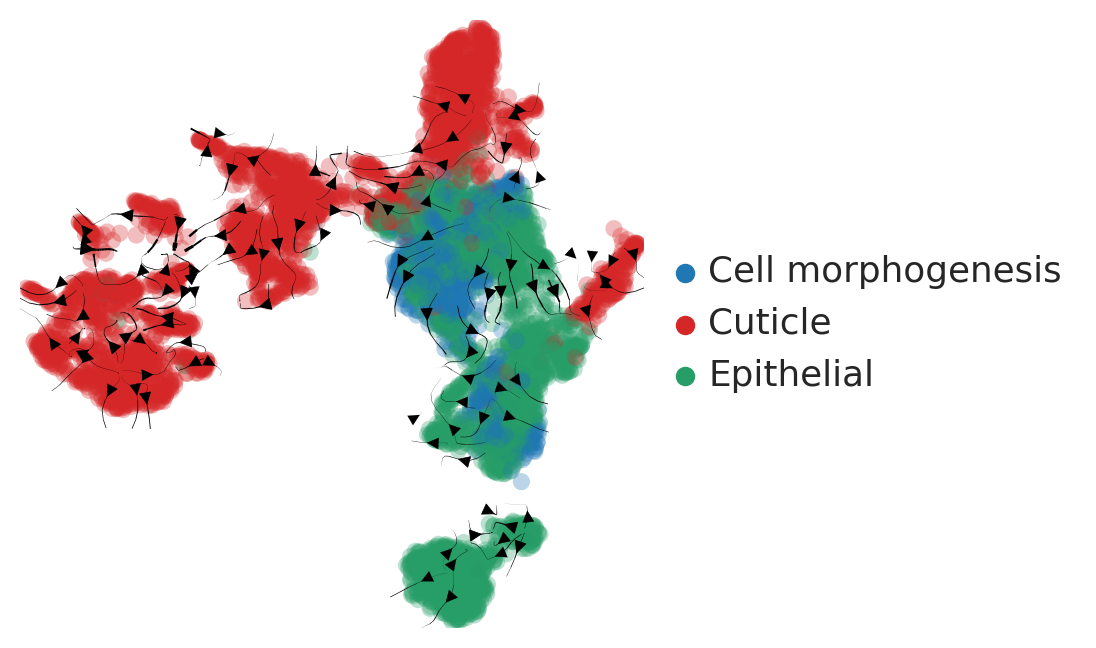

In [24]:
pal_celltype_plot={"Cell_morphogenesis":'#1f77b4',
  "Epithelial":'#279e68',
"Cuticle":'#d62728'}

plt.style.use('seaborn-white')
pk.plot_projection(basis="umap", color = ["celltype_plot"],recompute=True,
                    palette=pal_celltype_plot,
                   legend_loc="right",title="",save="Umap_cm_trajectory_celltype_merge.svg")

Projecting transition matrix onto `umap`
Adding `adata.obsm['T_fwd_umap']`
    Finish (0:00:01)
saving figure to file ./figures/scvelo_Umap_cm_trajectory_timepoint.svg


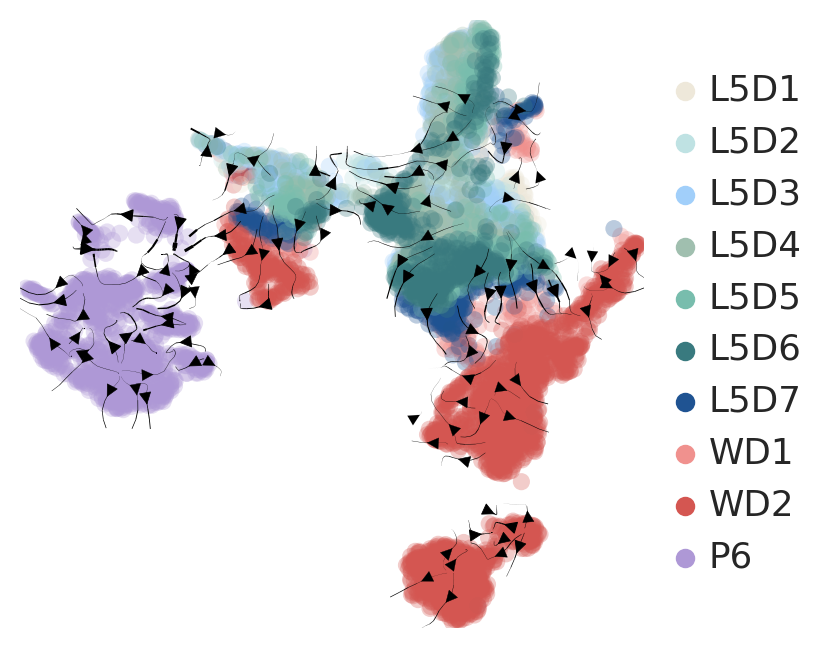

In [25]:
plt.style.use('seaborn-white')
pk.plot_projection(basis="umap", color = ["timepoint"],recompute=True,
                   palette=pal_timepoint,
                   legend_loc="right",title="",save="Umap_cm_trajectory_timepoint.svg")